# Projeto 1
### Matheus Steigenberg Populim 10734710

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.DiGraph()

In [3]:
G.add_edge(1,2,label = "1/2")
G.add_edge(2,1,label = "1/2")
G.add_edge(1,4,label = "1/2")
G.add_edge(4,1,label = "1/3")
G.add_edge(2,3, label = "1/2")
G.add_edge(4,3, label = "1/3")
G.add_edge(3,3,label = "1")
G.add_edge(5,5,label = "1")
G.add_edge(4,5, label = "1/3")


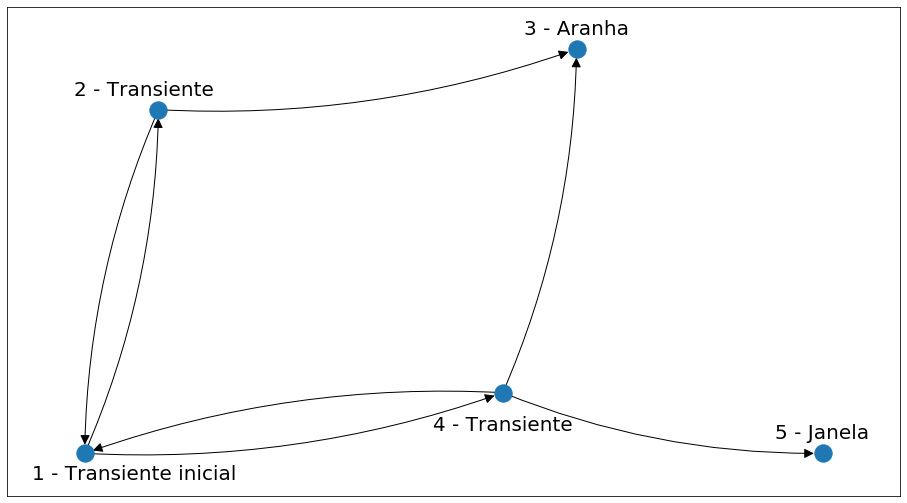

In [4]:
posicao = {1:(-0.5,-0.5),
         2:(-0.35,0.35),
         3:(0.5,0.5),
         4:(0.35,-0.35),
         5:(1.0,-0.5)}
posicao_label = {1:(-0.4,-0.55),
         2:(-0.38,0.4),
         3:(0.5,0.55),
         4:(0.35,-0.43),
         5:(1.0,-0.45)}

nomes = {1:"1 - Transiente inicial",
         2:"2 - Transiente",
         3:"3 - Aranha",
         4:"4 - Transiente",
         5:"5 - Janela"}
plt.rcParams["figure.figsize"] = (16,9)
nx.draw_networkx_nodes(G,pos = posicao,with_labels = True, node_size = 300)
nx.draw_networkx_labels(G,pos = posicao_label, labels = nomes,font_size=20)
nx.draw_networkx_edges(G,pos = posicao,arrows = True, arrowsize =20,with_labels = True,
                       connectionstyle="arc3,rad=0.1")
plt.show()

## 1
### a)
A mosca pode fugir pela janela percorrendo o caminho 1,4,5, com probabilidade $$\frac{1}{2}\cdot\frac{1}{3}=\frac{1}{6} $$<br>
E ela pode ser capturada pela aranha seguindo os caminhos 1,2,3 e 1,4,3, com probabilidade 
$$\frac{1}{2}\cdot\frac{1}{2}+\frac{1}{2}\cdot\frac{1}{3}=\frac{5}{12}$$

Assim, a probabilidade da mosca ser "absorvida" pela janela é dada por 
$$\frac{1}{1+\frac{5/12}{2/12}} = \frac{2}{7} = 0.28571$$

Podemos também encontrar esse resultado de forma teórica através do limite da potência da matriz de transição ao infinito:

In [5]:
matrix = np.array([[0,1/2,0,1/2,0],[1/2,0,1/2,0,0],[0,0,1,0,0],[1/3,0,1/3,0,1/3],[0,0,0,0,1]])
result = np.array([[0,1/2,0,1/2,0],[1/2,0,1/2,0,0],[0,0,1,0,0],[1/3,0,1/3,0,1/3],[0,0,0,0,1]])
n = 100000
for power in range(1,n):
    result = np.dot(result,matrix)

result = np.round(result,decimals=5)
print(result)

[[0.      0.      0.71429 0.      0.28571]
 [0.      0.      0.85714 0.      0.14286]
 [0.      0.      1.      0.      0.     ]
 [0.      0.      0.57143 0.      0.42857]
 [0.      0.      0.      0.      1.     ]]


O quinto número da primeira linha (0.28571) é justamente o $P^{100000}_{15}$, ou seja, a probabilidade da mosca, ao iniciar na posição 1, chegar na posição 5 após 100000 unidades de tempo.

Agora, de uma forma experimental, podemos encontrar o mesmo resultado executando uma simulação da caminhada aleatória 1 milhão de vezes e verificando a posição da mosca após 30 passos:

In [6]:


matrix = np.array([[0,1/2,0,1/2,0],[1/2,0,1/2,0,0],[0,0,1,0,0],[1/3,0,1/3,0,1/3],[0,0,0,0,1]])
janela = 0
aranha = 0
for trials in range(1000000):
    v = 0
    visitados = list()
    for t in range(30):
        r = np.random.uniform()
        i = 0
        count = matrix[v,i]
        while(r > count and i < 4):
            i += 1
            count += matrix[v,i]
        visitados.append(v)
        v = i
    if(visitados[29] == 4):
        janela += 1
    if(visitados[29] == 2):
        aranha += 1
print("Número de vezes pega pela aranha:",aranha,
      "\nNúmero de vezes que conseguiu fugir", janela,
      "\nNúmero de vezes que continuou voando dentro da casa", 1000000-aranha-janela)

Número de vezes pega pela aranha: 714757 
Número de vezes que conseguiu fugir 285239 
Número de vezes que continuou voando dentro da casa 4


A mosca conseguiu fugir em 28.5797% das tentativas, o que é equivalente ao calculado.<br>
(Nota: utilizo a palavra equivalente neste projeto com o sentido de suficientemente próximo)

### b)

A probabilidade de se visitar a posição 2 em $t=1$ é de $\frac{1}{2}$. Para se visitar a posição novamente em $t=3$, é necessário que a mosca esteja de volta na posição 1 no $t=2$, com $\frac{5}{12}$ de chance, e no tempo 3 vá para a posição 2 com $\frac{1}{2}$ de chance. Assim, observamos o seguinte padrão e podemos calcular o resultado a partir da série geométrica:
$$\frac{1}{2}+\frac{5}{12}\cdot\frac{1}{2}+\left(\frac{5}{12}\right)^{2}\cdot\frac{1}{2}+\left(\frac{5}{12}\right)^{3}\cdot\frac{1}{2}+\cdots=\frac{1}{2}\cdot\frac{1}{1-\frac{5}{12}} = \frac{6}{7} = 0.857148$$
Como $P_{12} = P_{14}$, o mesmo valor é válido para o nó 4.

Agora, testando o resultado por meio de uma simulação:

In [7]:
matrix = np.array([[0,1/2,0,1/2,0],[1/2,0,1/2,0,0],[0,0,1,0,0],[1/3,0,1/3,0,1/3],[0,0,0,0,1]])
visita2 = 0
visita4 = 0
for trials in range(1000000):
    v = 0
    visitados = list()
    while(v != 2 and v!=4):
        r = np.random.uniform()
        i = 0
        count = matrix[v,i]
        while(r > count and i < 4):
            i += 1
            count += matrix[v,i]
        if(v == 1):
            visita2 += 1
        if(v == 3):
            visita4 += 1
        v = i

print("Número de visitas ao nó 2:",visita2)
print("Número de visitas ao nó 4:",visita4)

Número de visitas ao nó 2: 856331
Número de visitas ao nó 4: 857839


A simulação resultou em 0.858552 visitas médias ao nó 2, e 0.857320 visitas médias ao nó 4, ambos resultados equivalentes ao valor calculado de 0.857148.

### c)
Agora que a aranha não está na posição 3, a situação se torna bastante diferente:<br>
Existem infinitas possibilidades da mosca sair do nó 1 e chegar ao nó 4. Para se obter o tempo médio para que isso ocorra, devemos multiplicar a probabilidade da mosca fugir em um tempo $t$ pelo próprio tempo $t$.<br>
Agora que a aranha não faz mais parte do problema, o nó 3 se torna recorrente.<br>
Além disso, para calcular o tempo médio até o nó 5, consideramos que a mosca para de se mover ao chegar no mesmo. Para isso, definiremos $P_{55} = 0$.

In [8]:
matrix = np.array([[0,1/2,0,1/2,0],[1/2,0,1/2,0,0],[0,1/2,0,1/2,0],[1/3,0,1/3,0,1/3],[0,0,0,0,0]])
print(matrix)

[[0.         0.5        0.         0.5        0.        ]
 [0.5        0.         0.5        0.         0.        ]
 [0.         0.5        0.         0.5        0.        ]
 [0.33333333 0.         0.33333333 0.         0.33333333]
 [0.         0.         0.         0.         0.        ]]


Assim, podemos calcular o tempo médio até o absorvimento utilizando a seguinte equação:
$$\sum_{t=1}^{\infty} t\cdot P^{t}_{15}$$

No entanto, para calcular essas probabilidades é necessário obtê-las das potências da matriz de transição.

In [9]:
valormedio = 0
for tempo in range(1,10000):
    result = np.linalg.matrix_power(matrix, tempo)
    valormedio += result[0,4]*tempo #baseado em 0, escrevemos P[0,4] ao invés de P[1,5]

print(valormedio)

11.999999999999982


Testando experimentalmente com uma simulação:

In [10]:
matrix = np.array([[0,1/2,0,1/2,0],[1/2,0,1/2,0,0],[0,1/2,0,1/2,0],[1/3,0,1/3,0,1/3],[0,0,0,0,1]])
visita = 0
tempo_absorcao = np.zeros(1000)
for trials in range(1000000):
    v = 0
    tempo = 0
    while(v!=4):
        r = np.random.uniform()
        i = 0
        count = matrix[v,i]
        while(r > count and i < 4):
            i += 1
            count += matrix[v,i]
        tempo += 1
        v = i
        if(v == 4 and tempo<1000):
            tempo_absorcao[tempo] += 1
    visita += tempo
print("Tempo médio levado para sair:",visita/1000000)
tempo_absorcao /= 1000000

Tempo médio levado para sair: 11.992412


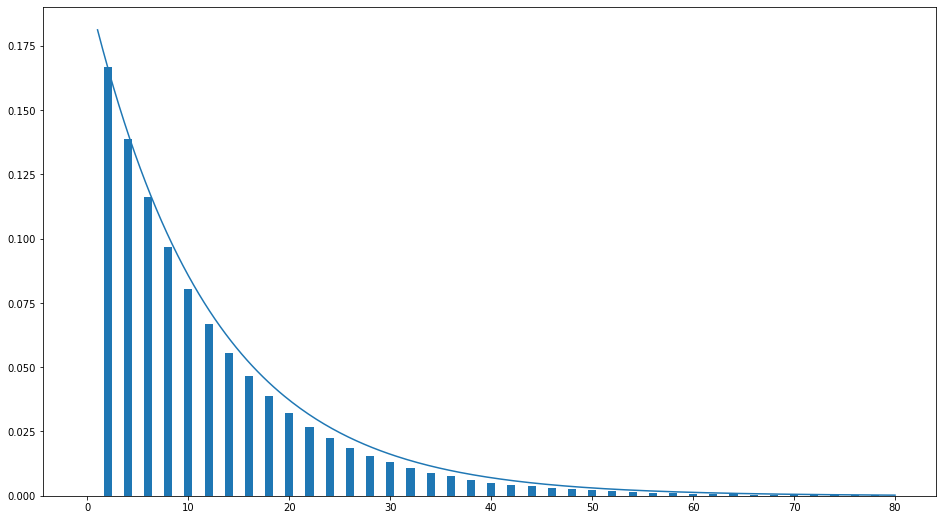

In [11]:
x = np.arange(80)
y = tempo_absorcao[:80]
xx = np.linspace(1,80,300)
yy = 2*np.exp(-(xx-2)/12.0)/12.0
plt.bar(x,y)
plt.plot(xx,yy)
plt.show()

Curiosamente, percebi que o padrão observado da distribuição de probabilidades de ser absorvido em um determinado tempo corresponde a uma distribuição exponencial com o parâmetro $\lambda = 12$. Assim, para fins de comparação, também plotei a função $$2\cdot\frac{e^\frac{-(x-2)}{12}}{12}$$

### d)
As simulações foram executadas juntamente com a resolução teórica dos exercícios.<br>
Felizmente, em todos os casos ambas se mostraram equivalentes, dada a devida margem de erro.

# Exercício 2


### a) 
Pela fórmula do apostador, a probabilidade do jogador A perder é dada por:
$$\frac{\left(\frac{q}{p}\right)^{i}-\left(\frac{q}{p}\right)^{N}}{1-\left(\frac{q}{p}\right)^{N}}$$

No entanto, devemos nos lembrar que cada aposta tem o valor de 2 reais. Assim, o jogador A tem 6 reais, valor "equivalente a 3 apostas", e o jogador B a 5. Assim, $i=3$ e $N=8$

$$\frac{\left(\frac{0.49}{0.51}\right)^{3}-\left(\frac{0.49}{0.51}\right)^{8}}{1-\left(\frac{0.49}{0.51}\right)^{8}} = 0.66193$$
Para obtermos a probabilidade dele ganhar: $1-0.66193=0.33807$

### b)
Executando a simulação para confirmar o resultado:

In [12]:
t = 0
p = 0.49
q = 0.51
ganhou = 0
for trials in range(1000000):
    dinheiro = 6
    while(dinheiro != 0 and dinheiro != 16):
        r = np.random.uniform()
        if(r < p):
            dinheiro+=2
        else:
            dinheiro-=2
        if(dinheiro == 16):
            ganhou +=1
            
print(ganhou)

337917


# Exercício 3
### a)

Denominando CARA por A e COROA por O
Temos 3 estados:

$$0\to OO$$
$$1\to OA$$
$$2\to AA$$

Considerando a probabilidade de se tirar cara como $p$, e a probabilidade de se tirar coroa como $q=1-p$, a matriz de transição é dada por:

$$ M = \left( \begin{matrix} q & p & 0 \\ q & 0 & p \\ 0 & 0 & 1 \end{matrix} \right) $$

O tempo médio até a absorção é dado por:
$$v_{0} = \sum_{k=0}^{2} E[T|X_{0}=0\cdot X_{1}=k]$$

$$v_{0} = E[T|X_{1}=0]\cdot P_{00}+E[T|X_{1}=1]\cdot P_{01}+E[T|X_{1}=2]\cdot P_{02}$$

Como $P_{02}=0$, temos que:

$$v_{0} = (1+v_{0})\cdot q +(1+v_{1})\cdot p $$


$$v_{0} = q+p+v_{0}\cdot q + v_{1}\cdot p $$


<strong>Eq.1:</strong>$$v_{0} = 1 + v_{0}\cdot q + v_{1}\cdot p $$

Agora temos que calcular o valor de $v_{1}$. Seguindo a mesma lógica que usamos para v_{0}:

$$v_{1} = E[T|X_{1}=0]\cdot P_{10}+E[T|X_{1}=1]\cdot P_{01}+E[T|X_{1}=2]\cdot P_{12}$$

$$v_{1} = (1+v_{0})\cdot q + 0 +1\cdot p $$

$$v_{1} = q + p + v_{0}\cdot q $$

$$v_{1} = 1 + v_{0}\cdot q $$

Substituindo na equação 1, temos:

$$v_{0} = 1 + v_{0}\cdot q + p\cdot\left(1+v_{0}\cdot q\right) $$

$$v_{0} = 1 + p v_{0}\cdot q + v_{0}\cdot q\cdot p $$



Isolando o v0:

$$-\frac{1+p}{v_{0}}=1+q+q\cdot p$$


$$\frac{v_{0}}{1+p}=\frac{1}{1-q-q\cdot p}$$


Substituindo $q=1-p$


$$v_{0} = \frac{1+p}{p -(1-p)}\cdot p$$


$$v_{0} = \frac{1+p}{p^{2}}$$


Assim, podemos ver claramente o comportamento da cadeia para diferente valores de $p$. Caso $p=1$, o tempo médio até a absorção é 2, porque o resultado sempre será Cara -> Cara.<br>
Caso $p=0.5$, o tempo médio é 6. E podemos perceber também que quando $p\to 0$, o tempo médio vai tende a $\infty$.

### b)
Testando agora com uma simulação, na qual para os valores de $p=0.01,p=0.02,p=0.03,...,p=1$, são feitos 1000 experimentos até que se consigam duas caras, e então é calculado o tempo médio levado nesses 1000 experimentos.

In [13]:

x = list()
y = list()
for prob in range(1,100):
    p = prob/100.0
    x.append(p)
    tempo = 0
    for t in range(1000):
        count = 0
        while(count<2):
            r = np.random.uniform()
            if(r < p):
                count+=1
            else:
                count=0
            tempo+=1
    y.append(tempo/1000)


Em comparação, também vou plotar o valor obtido pela função $$v_{0} = \frac{1+p}{p^{2}}$$ calculada no item a).

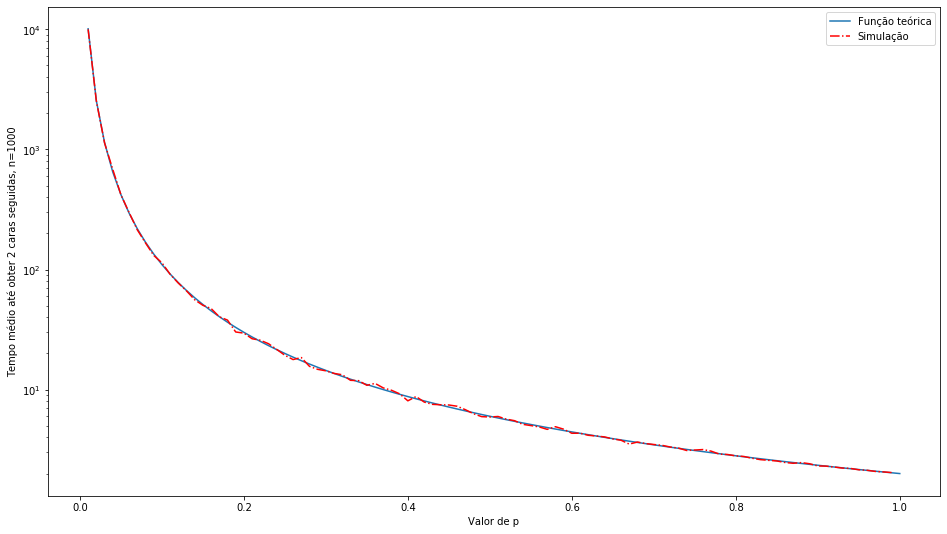

In [14]:
xx = np.linspace(0.01,1,100)
yy = (1+xx)/(xx*xx)

plt.plot(xx,yy,label='Função teórica')
plt.plot(x,y,linestyle='-.',color='red',label='Simulação')
plt.yscale('log')
plt.ylabel('Tempo médio até obter 2 caras seguidas, n=1000')
plt.xlabel('Valor de p')
plt.legend()
plt.show()

É possível observar que os resultados teórico e experimental são equivalentes.

# Exercício 4
### a)
A matriz é dada por:

In [15]:
matriz = np.array([[0,3/6,0,1/6,2/6],[1,0,0,0,0],[0,0,0,0,1],[1/5,0,0,0,4/5],[2/12,0,6/12,4/12,0]])
result = np.array([[0,3/6,0,1/6,2/6],[1,0,0,0,0],[0,0,0,0,1],[1/5,0,0,0,4/5],[2/12,0,6/12,4/12,0]])
print(matriz)

[[0.         0.5        0.         0.16666667 0.33333333]
 [1.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.2        0.         0.         0.         0.8       ]
 [0.16666667 0.         0.5        0.33333333 0.        ]]


Para encontrarmos a distribuição estacionária $\psi$ ,sabemos que:

$$\psi M=\psi$$

Assim, temos o seguinte sistema:

$$ \left( \begin{matrix} a \\ b \\ c \\ d \\ e \end{matrix} \right) \cdot \left( 
\begin{matrix}
0 & \frac{1}{2} & 0 & \frac{1}{6} & \frac{1}{3} \\
1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 \\
\frac{1}{5} & 0 & 0 & 0 & \frac{4}{5} \\
\frac{1}{6} & 0 & \frac{1}{2} & \frac{1}{3} & 0
\end{matrix} \right) 
=
\left( \begin{matrix} a \\ b \\ c \\ d \\ e \end{matrix} \right)
$$

$$a = b+\frac{d}{5}+\frac{e}{6}$$

$$b = \frac{a}{2}$$

$$c = \frac{e}{2}$$

$$d = \frac{a}{6}+\frac{e}{3}$$

$$e = \frac{a}{3}+c+\frac{4d}{5}$$

Lembrando que a soma de toda distribuição de probabilidades sempre deve ser 1:

$$a+b+c+d+e=1$$

Ao resolver o sistema, obtemos

$$a=\frac{6}{32}$$

$$b=\frac{3}{32}$$

$$c=\frac{6}{32}$$

$$d=\frac{5}{32}$$

$$e=\frac{12}{32}$$

PS: A distribuição estacionária também pode ser encontrada ao elevar a matriz a $n \to \infty$

In [16]:
matriz = np.array([[0,3/6,0,1/6,2/6],[1,0,0,0,0],[0,0,0,0,1],[1/5,0,0,0,4/5],[1/6,0,1/2,1/3,0]])
result = np.array([[0,3/6,0,1/6,2/6],[1,0,0,0,0],[0,0,0,0,1],[1/5,0,0,0,4/5],[1/6,0,6/12,1/3,0]])
n = 1000
for power in range(1,n):
    result = np.dot(result,matriz)

result = np.round(result,decimals=5)
print(result)

[[0.1875  0.09375 0.1875  0.15625 0.375  ]
 [0.1875  0.09375 0.1875  0.15625 0.375  ]
 [0.1875  0.09375 0.1875  0.15625 0.375  ]
 [0.1875  0.09375 0.1875  0.15625 0.375  ]
 [0.1875  0.09375 0.1875  0.15625 0.375  ]]


E podemos testar esse resultado em simulação:

In [17]:
matriz = np.array([[0,1/2,0,1/6,1/3],[1,0,0,0,0],[0,0,0,0,1],[1/5,0,0,0,4/5],[1/6,0,1/2,1/3,0]])
print(matriz)
#escolhemos o primeiro vértice com igual probabilidade
v = 1
passos = 0
visitas = np.zeros((5))
print(visitas)
visitamedia = list((list(),list(),list(),list(),list()))
print(visitamedia)
tempo = list()
for t in range(1000000):
    tempo.append(t)
    r = np.random.uniform()
    i = 0
    count = matriz[v,i]
    while(count < r and i < 4):
        i += 1
        count += matriz[v,i]
    visitas[v] += 1
    for a in range(5):
        visitamedia[a].append(visitas[a]/(t+1))
    v = i

[[0.         0.5        0.         0.16666667 0.33333333]
 [1.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.2        0.         0.         0.         0.8       ]
 [0.16666667 0.         0.5        0.33333333 0.        ]]
[0. 0. 0. 0. 0.]
[[], [], [], [], []]


In [18]:
print(visitas)

[186879.  93065. 187685. 156725. 375646.]


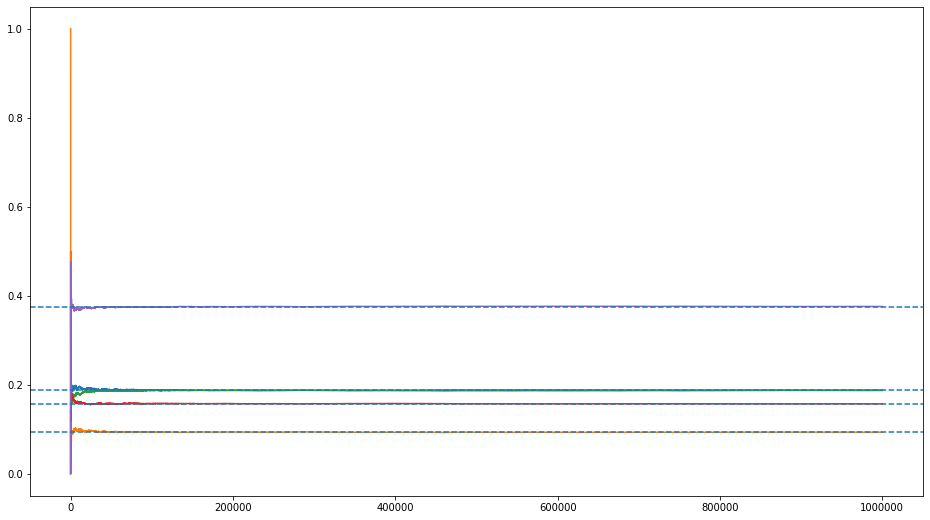

In [19]:
#plt.style.use('seaborn-whitegrid')
#plt.plot(tempo,visitamedia[4], linewidth=2.0)
for i in range(5):
    plt.plot(tempo,visitamedia[i])

plt.axhline(y=0.375,linestyle='--')
plt.axhline(y=0.1875,linestyle='--')
plt.axhline(y=0.09375,linestyle='--')
plt.axhline(y=0.15625,linestyle='--')
plt.show()